In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from datetime import date
from datetime import datetime
from keras.constraints import maxnorm
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential
from matplotlib import pyplot
from matplotlib.dates import date2num
from numpy import asarray
from os import listdir
from os.path import isfile, join
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from pylab import rcParams
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor
import calendar
import datetime
import joblib
import math
import matplotlib.pyplot as plt
import numpy
import numpy as np
import os
import os.path
import pandas as pd
import re
import requests
import seaborn as sns
import sys
import tempfile
import uuid

sns.set_style("white")
plt.style.use('ggplot')
rcParams['figure.figsize'] = 14,3

In [2]:
from apps.error_metrics import ErrorMetrics
from apps.linear_regression_predictor import LinearRegressionPredictor
from apps.lstm_predictor import LSTMPredictor
from apps.main_module import MainModule
from apps.model_factory import ModelFactory
from apps.predictor_interface import PredictorInterface
from apps.random_forest_regressor_predictor import RandomForestRegressorPredictor
from apps.rnn_predictor import RNNPredictor
from apps.svr_predictor import SVRPredictor
from apps.time_utilities import TimeUtilities
from apps.xgb_regressor_predictor import XGBRegressorPredictor

In [3]:
mainModule = MainModule.getInstance()

Remove DB
Load DB
downloadFile
Creation of the directory C:\Users\Oscar\AppData\Local\Temp\239d9f5c-f97e-11ea-82c9-181deaf44bd2 failed
downloadFile
Creation of the directory C:\Users\Oscar\AppData\Local\Temp\2ad5cb1a-f97e-11ea-9ed2-181deaf44bd2 failed
downloadFile
Creation of the directory C:\Users\Oscar\AppData\Local\Temp\2b364198-f97e-11ea-8783-181deaf44bd2 failed
downloadFile
Creation of the directory C:\Users\Oscar\AppData\Local\Temp\2ba21db4-f97e-11ea-bc11-181deaf44bd2 failed
downloadFile
Creation of the directory C:\Users\Oscar\AppData\Local\Temp\2c05dfee-f97e-11ea-9164-181deaf44bd2 failed
downloadFile
Creation of the directory C:\Users\Oscar\AppData\Local\Temp\2c7fa4b0-f97e-11ea-b00f-181deaf44bd2 failed
downloadFile
Creation of the directory C:\Users\Oscar\AppData\Local\Temp\2cf0fb36-f97e-11ea-9a30-181deaf44bd2 failed
downloadFile
Creation of the directory C:\Users\Oscar\AppData\Local\Temp\2d5cce50-f97e-11ea-9c7c-181deaf44bd2 failed
downloadFile
Creation of the directory C:\User

C:\Users\Oscar\Documents\cortex\src\apps\data_warehouse_controller.py:105: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\data_warehouse_controller.py:106: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

2
3
4
5
6
7
8
9
10
11


In [4]:
featureEngineering = mainModule.FeatureEngineering()
scalerService = mainModule.ScalerService()
dfFiltered = featureEngineering.getDataRaw()

In [5]:
dataWarehouseController = mainModule.DataWarehouseController()

In [6]:
dataProfiles = dataWarehouseController.getDataProfiles()
dataProfiles.head(3)

fecha      valor   tipo      tipo_docto  numero_factura  diff  \
0 2016-08-19  9224599.0  cargo         Factura               1   0.0   
1 2016-10-06  2411599.0  abono  Recibo de Caja               8  48.0   
2 2016-10-07  6813000.0  abono  Recibo de Caja               9   1.0   

   timeSinceStart numero_cargo  paymentFinished id        T  valorCargo  
0               0            1             True  0  2016T08   9224599.0  
1              48            1             True  0  2016T10   9224599.0  
2              49            1             True  0  2016T10   9224599.0

In [7]:
dataFiles = dataWarehouseController.getDataTable()
dataFiles.head(3)

tipo_docto  numero      fecha promedio    cargos abonos  nuevo_saldo  \
0    Factura       1 2016-08-19       49   9224599      0      9224599   
1    Factura       2 2016-08-22       58    741356      0      9965955   
2    Factura       3 2016-08-29       82  15389465      0     25355420   

                            enviado_a id  fileName       lat        lon  
0  CL 29 27 36 BRR EL RECUERDO - CALI  0  BEEMMODA  3.427749 -76.515945  
1  CL 29 27 36 BRR EL RECUERDO - CALI  0  BEEMMODA  3.427749 -76.515945  
2  CL 29 27 36 BRR EL RECUERDO - CALI  0  BEEMMODA  3.427749 -76.515945

In [8]:
dfFiltered.head(3)

time_diff_bin_0  time_diff_bin_1  time_diff_bin_2  time_diff_bin_3  \
index                                                                        
201510                0                0                0                0   
201511                0                1                0                0   
201512                0                0                0                0   

        time_diff_bin_4  time_since_start_bin_0  time_since_start_bin_1  \
index                                                                     
201510                0                       0                       0   
201511                0                       1                       0   
201512                0                       0                       0   

        time_since_start_bin_2  time_since_start_bin_3  \
index                                                    
201510                       0                       0   
201511                       0                       0   
201512                       0                       0   

        time_since_start_bin_4  ...       y_v_2  y_p_2       y_v_3  y_p_3  \
index                           ...                                         
201510                       0  ...         0.0      0   8688300.0      1   
201511                       0  ...   8688300.0      1  31806259.0      1   
201512                       0  ...  31806259.0      1  30666322.0      1   

             y_v_4  y_p_4       y_v_5  y_p_5       y_v_6  y_p_6  
index                                                            
201510  31806259.0      1  30666322.0      1  30218526.0      1  
201511  30666322.0      1  30218526.0      1  30942349.0      1  
201512  30218526.0      1  30942349.0      1  43882137.0      1  

[3 rows x 148 columns]

In [9]:
rows = list(dfFiltered.index)
rows.sort()
limitDate = 201700

validationRows = rows[-6:]
firstTrainSetRows = [i for i in rows[:-6] if limitDate > i]
tempRows = [i for i in rows[:-6] if limitDate <= i]
splitRows=[{'id': array.min(), \
            'train': [i for i in rows if i < array.min()], \
            'test': list(array)} for array in np.array_split(tempRows, 4)]

splitRows, validationRows

([{'id': 201701,
   'train': [201510,
    201511,
    201512,
    201601,
    201602,
    201603,
    201604,
    201605,
    201606,
    201607,
    201608,
    201609,
    201610,
    201611,
    201612],
   'test': [201701,
    201702,
    201703,
    201704,
    201705,
    201706,
    201707,
    201708,
    201709]},
  {'id': 201710,
   'train': [201510,
    201511,
    201512,
    201601,
    201602,
    201603,
    201604,
    201605,
    201606,
    201607,
    201608,
    201609,
    201610,
    201611,
    201612,
    201701,
    201702,
    201703,
    201704,
    201705,
    201706,
    201707,
    201708,
    201709],
   'test': [201710,
    201711,
    201712,
    201801,
    201802,
    201803,
    201804,
    201805,
    201806]},
  {'id': 201807,
   'train': [201510,
    201511,
    201512,
    201601,
    201602,
    201603,
    201604,
    201605,
    201606,
    201607,
    201608,
    201609,
    201610,
    201611,
    201612,
    201701,
    201702,
    201703,


In [10]:
firstTrainSetRows

[201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612]

In [11]:
scalerService.fit(dfFiltered)
scalerService.saveStats()

In [12]:
xColumns, yColumns = scalerService.getXYColumns()

In [13]:
df = scalerService.transform(dfFiltered)
df.head(3)

time_diff_bin_0  time_diff_bin_1  time_diff_bin_2  time_diff_bin_3  \
index                                                                        
201510        -0.219588        -0.981788        -1.004162        -0.227999   
201511        -0.219588        -0.860131        -1.004162        -0.227999   
201512        -0.219588        -0.981788        -1.004162        -0.227999   

        time_diff_bin_4  time_since_start_bin_0  time_since_start_bin_1  \
index                                                                     
201510        -0.272301               -0.984632               -0.748121   
201511        -0.272301               -0.889988               -0.748121   
201512        -0.272301               -0.984632               -0.748121   

        time_since_start_bin_2  time_since_start_bin_3  \
index                                                    
201510               -0.367781                -0.23218   
201511               -0.367781                -0.23218   
201512               -0.367781                -0.23218   

        time_since_start_bin_4  ...     y_v_2     y_p_2     y_v_3     y_p_3  \
index                           ...                                           
201510               -0.189012  ... -1.111115 -3.196489 -0.866883  0.272301   
201511               -0.189012  ... -0.844199  0.307355 -0.154939  0.272301   
201512               -0.189012  ... -0.133986  0.307355 -0.190045  0.272301   

           y_v_4     y_p_4     y_v_5     y_p_5     y_v_6     y_p_6  
index                                                               
201510 -0.170911  0.272301 -0.207262  0.272301 -0.222836  0.272301  
201511 -0.205937  0.272301 -0.220892  0.272301 -0.201011  0.272301  
201512 -0.219697  0.272301 -0.198860  0.272301  0.189148  0.272301  

[3 rows x 148 columns]

In [14]:
class PredictorManager():
    __df = None
    __models = {}
    def __init__(self):
        self.XYData = {}
        self.__models[RNNPredictor.getModelName()] = {'config': RNNPredictor.getDefaultParams()}
        self.__models[LSTMPredictor.getModelName()] = {'config': LSTMPredictor.getDefaultParams()}
        self.__models[SVRPredictor.getModelName()] = {'config': SVRPredictor.getDefaultParams()}
        self.__models[XGBRegressorPredictor.getModelName()] = {'config': XGBRegressorPredictor.getDefaultParams()}
        self.__models[LinearRegressionPredictor.getModelName()] = {'config': LinearRegressionPredictor.getDefaultParams()}
        self.__models[RandomForestRegressorPredictor.getModelName()] = {'config': RandomForestRegressorPredictor.getDefaultParams()}
            
    def trainModel(self, alName, df, xColumns, yColumns, splitRows, configPermuteeritud={}):
        
        for dat in splitRows:
            q = dat['id']
            train = df[df.index.isin(dat['train'])]
            test = df[df.index.isin(dat['test'])]
            
            Xtrain, Ytrain = train[xColumns], train[yColumns]
            Xtest, Ytest = test[xColumns], test[yColumns]
            
            self.XYData[str(q)+'_Xtrain'] = Xtrain.copy()
            self.XYData[str(q)+'_Ytrain'] = Ytrain.copy()
            self.XYData[str(q)+'_Ytest'] = Ytest.copy()
        
            for k in [alName]:#list(self.__models.keys())[:]:
                #print(q, k)
                
                self.__models[k]['model'] =  ModelFactory.getInstance(mainModule.EnvVarService(), k)
                
                self.__models[k]['model'].setParams({**self.__models[k]['config'],\
                            **configPermuteeritud,\
                            'inputShape': len(xColumns),\
                            'outputShape': len(yColumns)\
                            })
                
                self.__models[k]['model'].createModel()
                history = self.__models[k]['model'].fit(Xtrain, Ytrain, Xtest, Ytest)
                
                Ytrainpred = self.__models[k]['model'].predict(Xtrain)
                Ytestpred = self.__models[k]['model'].predict(Xtest)
        
                self.__models[k]['metrics_train_'+str(q)] = ErrorMetrics.generateMetrics(Ytrain, Ytrainpred)
                self.__models[k]['metrics_test_'+str(q)] = ErrorMetrics.generateMetrics(Ytest, Ytestpred)
                self.__models[k]['history_'+str(q)] = history
                self.__models[k]['model'].saveModel()

                for i,v in enumerate(yColumns): 
                    self.XYData[str(q)+'_Ytrain'][v+'_Ytrainpred_'+k] = Ytrainpred[:,i]
                    self.XYData[str(q)+'_Ytest'][v+'_Ytestpred_'+k] = Ytestpred[:,i]

    def getModels(self):
        return self.__models
    
    def getMetrics(self):
        lista = []
        metrics = self.__models
        for a in metrics.keys():
            for pt in metrics[a].keys():
                if('metrics_test_' in pt):
                    for m in metrics[a][pt].keys():
                        for v in metrics[a][pt][m].keys():
                            lista.append([a, pt, m, v, metrics[a][pt][m][v]])
        dfMetrics = pd.DataFrame(lista, columns =['Algorithm', 'Time frame', 'Metric', 'Target', 'Value']) 
        return dfMetrics
    
    def predictData(self, df, xColumns, yColumns, rows):
        data = df[df.index.isin(rows)]
        Xdata = data[xColumns]
        predictedData = {}
        for k in list(self.__models.keys())[:]:
            predictedData[k] = pd.DataFrame(self.__models[k]['model'].predict(Xdata), columns = yColumns, index = rows)
        return predictedData
        
    def getXYdata(self):
        return self.XYData

    def getModel(self, k):
        return self.__models[k]['model']


In [15]:
xColumns, yColumns = scalerService.getXYColumns()

In [16]:
pm = PredictorManager()

In [17]:
def getPredictedValues(alName, period, yVar, Ytot='Ytrain'):
    dfTem = pm.getXYdata()[period + '_' + Ytot]
    dfTem = dfTem[[c for c in dfTem.columns if ((yVar in c) and(alName in c))]]
    dfTem.rename(columns={\
                'y_v'+yVar+'_'+Ytot+'pred_'+alName: 'y_v'+yVar,\
                'y_p'+yVar+'_'+Ytot+'pred_'+alName: 'y_p'+yVar},inplace=True)
    dfTem = scalerService.reverseTransform(dfTem, list(dfTem.columns))
    dfTem['y_p'+yVar] = dfTem['y_p'+yVar].apply(lambda s: [0,1][s>=0.5])
    dfTem['y_v'+yVar] = dfTem['y_v'+yVar] * dfTem['y_p'+yVar]
    del dfTem['y_p'+yVar]
    return dfTem

In [18]:

yVar = '_1'
period = '201701'

In [19]:
def trainAndPredict(alName, yVar, periodList):
    xColumns, yColumns = scalerService.getXYColumns()
    
    dfTem = dfFiltered[['payments_sum']].copy()
    
    for i, period in enumerate(periodList):
        yTrain = getPredictedValues(alName, period, yVar, Ytot='Ytrain')
        yTest = getPredictedValues(alName, period, yVar, Ytot='Ytest')
        
        if(i==0):
            dfTem['yTrain_'+period] = yTrain
            dfTem['yTrain_'+period] = dfTem['yTrain_'+period].shift(int(yVar.replace('_','')))
        
        dfTem['yTest_'+period] = yTest
        dfTem['yTest_'+period] = dfTem['yTest_'+period].shift(int(yVar.replace('_','')))
        
        

    dfTem['index'] = dfTem.index
    dfTem.index = pd.to_datetime(dfTem['index'].apply(TimeUtilities.mapDate))
    del dfTem['index']
    
    errorList = []
    for i, c in enumerate(dfTem.columns):
        if('yTest_' in c):
            dfTemp2 = dfTem[dfTem[c].notnull()]
            errorList.append(ErrorMetrics.generateMetrics(dfTemp2['payments_sum'].values, dfTemp2[c].values, True))
    dfError = pd.DataFrame(errorList) 
    return dfTem, dfError

    

In [20]:
def plotData(alName, yVar, dfTem):
    fig, ax = plt.subplots()
    for i, c in enumerate(dfTem.columns):
        l = ''
        color = ['b','g'][i%2] 
        if(i == 0):
            l = 'Real value'
        elif(i == 1):
            l = 'Train'
        else:
            l = 'Test '+str(i)
            
        if('yTest_' in c):
            dfTemp2 = dfTem[dfTem[c].notnull()]
            ax.plot(dfTem[c],label=l)
            ax.axvspan(date2num(dfTemp2[c].index[0]), date2num(dfTemp2[c].index[-1]),  facecolor=color, alpha=0.1)
        else:
            ax.plot(dfTem[c],label=l)
    
    ax.legend(loc='best')
    plt.title(alName+' '+yVar)
    plt.show()

In [21]:
alName = RNNPredictor.getModelName()
pm.trainModel(alName, df, xColumns, yColumns, splitRows)

Epoch 1/50
1/1 [==============================] - 1s 594ms/step - loss: 0.7758 - accuracy: 0.2000 - val_loss: 1.1692 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 16ms/step - loss: 0.7743 - accuracy: 0.0667 - val_loss: 1.1699 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 16ms/step - loss: 0.7721 - accuracy: 0.1333 - val_loss: 1.1702 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 18ms/step - loss: 0.7716 - accuracy: 0.0000e+00 - val_loss: 1.1708 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 16ms/step - loss: 0.7698 - accuracy: 0.2000 - val_loss: 1.1716 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 15ms/step - loss: 0.7690 - accuracy: 0.3333 - val_loss: 1.1727 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 15ms/step - loss: 0.7685 - accuracy: 0.2000 - val_loss: 1.1738 - val_accuracy: 0.000

Epoch 8/50
1/1 [==============================] - 0s 14ms/step - loss: 0.9179 - accuracy: 0.0833 - val_loss: 0.4224 - val_accuracy: 0.0000e+00
Epoch 9/50
1/1 [==============================] - 0s 15ms/step - loss: 0.9180 - accuracy: 0.1250 - val_loss: 0.4220 - val_accuracy: 0.0000e+00
Epoch 10/50
1/1 [==============================] - 0s 16ms/step - loss: 0.9159 - accuracy: 0.1250 - val_loss: 0.4214 - val_accuracy: 0.0000e+00
Epoch 11/50
1/1 [==============================] - 0s 15ms/step - loss: 0.9170 - accuracy: 0.0417 - val_loss: 0.4208 - val_accuracy: 0.0000e+00
Epoch 12/50
1/1 [==============================] - 0s 15ms/step - loss: 0.9161 - accuracy: 0.0833 - val_loss: 0.4203 - val_accuracy: 0.0000e+00
Epoch 13/50
1/1 [==============================] - 0s 16ms/step - loss: 0.9144 - accuracy: 0.0833 - val_loss: 0.4196 - val_accuracy: 0.0000e+00
Epoch 14/50
1/1 [==============================] - 0s 16ms/step - loss: 0.9149 - accuracy: 0.1250 - val_loss: 0.4191 - val_accuracy: 0.000

2/2 [==============================] - 0s 14ms/step - loss: 0.7807 - accuracy: 0.0919 - val_loss: 1.0193 - val_accuracy: 0.0000e+00
Epoch 16/50
2/2 [==============================] - 0s 14ms/step - loss: 0.7822 - accuracy: 0.0612 - val_loss: 1.0181 - val_accuracy: 0.0000e+00
Epoch 17/50
2/2 [==============================] - 0s 14ms/step - loss: 0.7805 - accuracy: 0.0612 - val_loss: 1.0168 - val_accuracy: 0.0000e+00
Epoch 18/50
2/2 [==============================] - 0s 13ms/step - loss: 0.7646 - accuracy: 0.0612 - val_loss: 1.0151 - val_accuracy: 0.0000e+00
Epoch 19/50
2/2 [==============================] - 0s 13ms/step - loss: 0.7780 - accuracy: 0.0612 - val_loss: 1.0136 - val_accuracy: 0.1111
Epoch 20/50
2/2 [==============================] - 0s 15ms/step - loss: 0.7631 - accuracy: 0.0000e+00 - val_loss: 1.0122 - val_accuracy: 0.1111
Epoch 21/50
2/2 [==============================] - 0s 15ms/step - loss: 0.7619 - accuracy: 0.0612 - val_loss: 1.0110 - val_accuracy: 0.1111
Epoch 22/50


2/2 [==============================] - 0s 14ms/step - loss: 0.7470 - accuracy: 0.1895 - val_loss: 1.2443 - val_accuracy: 0.1111
Epoch 24/50
2/2 [==============================] - 0s 14ms/step - loss: 0.7537 - accuracy: 0.2788 - val_loss: 1.2410 - val_accuracy: 0.2222
Epoch 25/50
2/2 [==============================] - 0s 14ms/step - loss: 0.7368 - accuracy: 0.2421 - val_loss: 1.2353 - val_accuracy: 0.2222
Epoch 26/50
2/2 [==============================] - 0s 14ms/step - loss: 0.7301 - accuracy: 0.2366 - val_loss: 1.2291 - val_accuracy: 0.2222
Epoch 27/50
2/2 [==============================] - 0s 14ms/step - loss: 0.7372 - accuracy: 0.2212 - val_loss: 1.2246 - val_accuracy: 0.2222
Epoch 28/50
2/2 [==============================] - 0s 13ms/step - loss: 0.7526 - accuracy: 0.2262 - val_loss: 1.2212 - val_accuracy: 0.2222
Epoch 29/50
2/2 [==============================] - 0s 15ms/step - loss: 0.7024 - accuracy: 0.2158 - val_loss: 1.2187 - val_accuracy: 0.2222
Epoch 30/50
2/2 [===============

In [22]:
metrics = pm.getMetrics()
metrics

Algorithm           Time frame Metric Target       Value
0    RNNPredictor  metrics_test_201701   MAPE  y_v_1  100.000000
1    RNNPredictor  metrics_test_201701   MAPE  y_p_1   75.278868
2    RNNPredictor  metrics_test_201701   MAPE  y_v_2  100.000000
3    RNNPredictor  metrics_test_201701   MAPE  y_p_2   76.490776
4    RNNPredictor  metrics_test_201701   MAPE  y_v_3  100.000000
..            ...                  ...    ...    ...         ...
283  RNNPredictor  metrics_test_201904     R2  y_p_4   -0.096369
284  RNNPredictor  metrics_test_201904     R2  y_v_5   -0.016359
285  RNNPredictor  metrics_test_201904     R2  y_p_5   -0.190004
286  RNNPredictor  metrics_test_201904     R2  y_v_6    0.023757
287  RNNPredictor  metrics_test_201904     R2  y_p_6   -0.203951

[288 rows x 5 columns]

config
model
metrics_train_201701
metrics_test_201701
history_201701
*-*-*-* <tensorflow.python.keras.callbacks.History object at 0x000001D1D4DF4EC8>


metrics_train_201710
metrics_test_201710
history_201710
*-*-*-* <tensorflow.python.keras.callbacks.History object at 0x000001D1CD5BFCC8>


metrics_train_201807
metrics_test_201807
history_201807
*-*-*-* <tensorflow.python.keras.callbacks.History object at 0x000001D1D70E82C8>


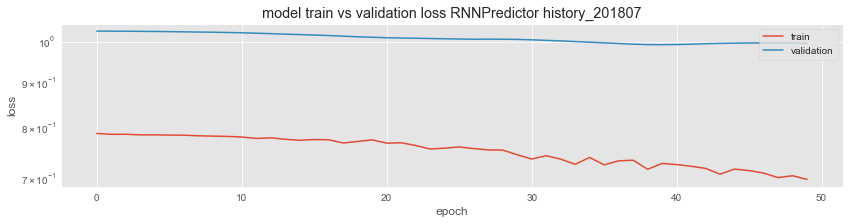

metrics_train_201904
metrics_test_201904
history_201904
*-*-*-* <tensorflow.python.keras.callbacks.History object at 0x000001D1D82929C8>


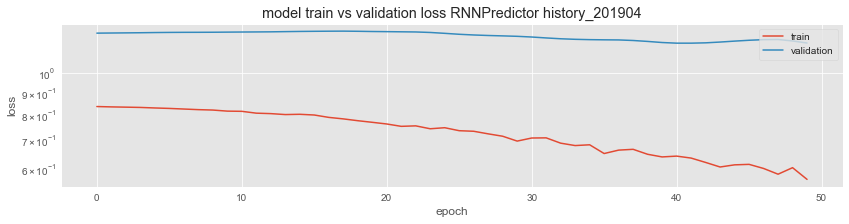

config
config
config
config
config


In [23]:
metrics = pm.getModels()
for a in metrics.keys():
    for pt in metrics[a].keys():
        print(pt)
        if(('history' in pt) and (metrics[a][pt] != None)):
            history = metrics[a][pt]
            print('*-*-*-*',history)
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('model train vs validation loss '+a+' '+pt)
            plt.yscale("log")
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.legend(['train', 'validation'], loc='upper right')
            plt.show()

         MAPE         MPE           MAE           MSE          RMSE        R2
0         inf        -inf  2.876304e+07  1.296807e+15  3.601120e+07 -0.007226
1  136.180583 -110.257065  2.241598e+07  6.422281e+14  2.534222e+07 -0.039610
2   69.988816  -22.695242  3.360455e+07  2.428027e+15  4.927501e+07 -0.168170
3   42.543943   -6.838108  2.318534e+07  1.116927e+15  3.342046e+07 -0.243662


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



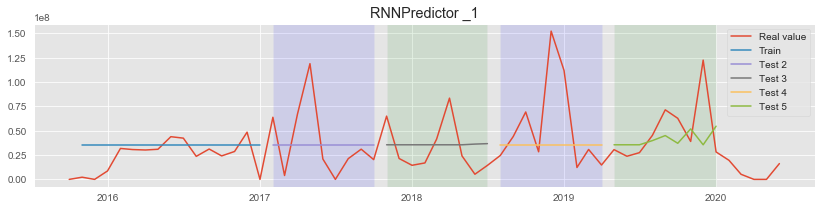

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



         MAPE         MPE           MAE           MSE          RMSE        R2
0         inf        -inf  2.909442e+07  1.300797e+15  3.606657e+07 -0.005119
1  138.527794 -124.744943  2.035447e+07  5.578931e+14  2.361976e+07 -0.159640
2   70.770581  -24.185516  3.380246e+07  2.408086e+15  4.907225e+07 -0.178985
3   43.757063  -20.656085  1.884871e+07  6.602120e+14  2.569459e+07  0.310614


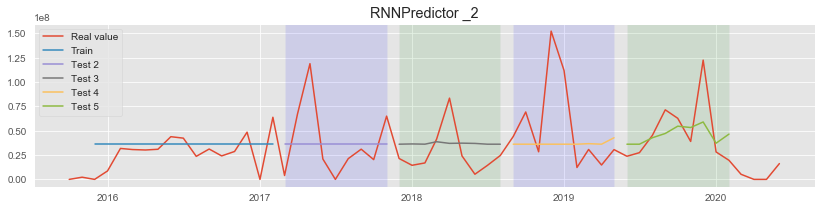

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



         MAPE         MPE           MAE           MSE          RMSE        R2
0         inf        -inf  2.737601e+07  1.204210e+15  3.470174e+07 -0.012434
1  140.527694 -126.640499  1.928067e+07  4.685431e+14  2.164586e+07  0.066636
2   84.793381  -43.653419  3.591289e+07  2.417412e+15  4.916718e+07 -0.133795
3  134.362127 -109.945729  2.452345e+07  8.844417e+14  2.973957e+07  0.192394


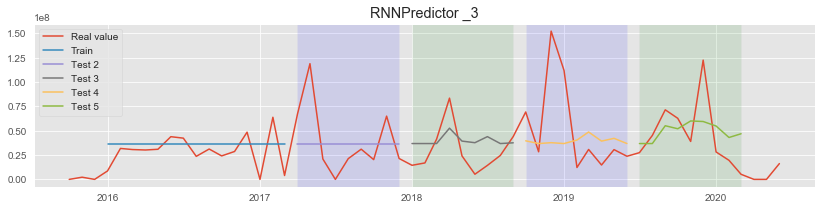

         MAPE         MPE           MAE           MSE          RMSE        R2
0         inf        -inf  2.679522e+07  1.160556e+15  3.406693e+07 -0.005539
1  125.559671 -101.493962  2.079138e+07  5.773475e+14  2.402806e+07  0.055686
2   85.076364  -55.119704  3.328412e+07  2.173884e+15  4.662492e+07 -0.010882
3         inf        -inf  2.815019e+07  9.777551e+14  3.126908e+07  0.240791


E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



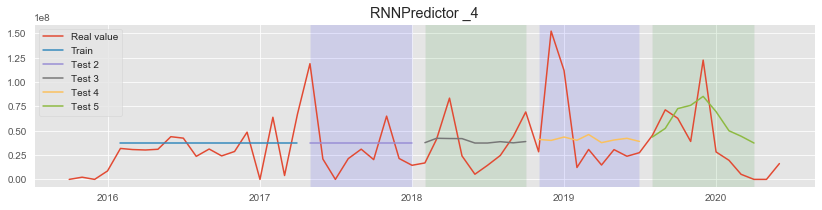

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



         MAPE        MPE           MAE           MSE          RMSE        R2
0         inf       -inf  2.424077e+07  6.927216e+14  2.631960e+07 -1.511098
1  117.258600 -93.071247  1.930685e+07  4.908715e+14  2.215562e+07  0.147624
2   79.128547 -44.234583  3.245487e+07  2.265752e+15  4.759992e+07 -0.076378
3         inf       -inf  3.143331e+07  1.499552e+15  3.872405e+07 -0.016359


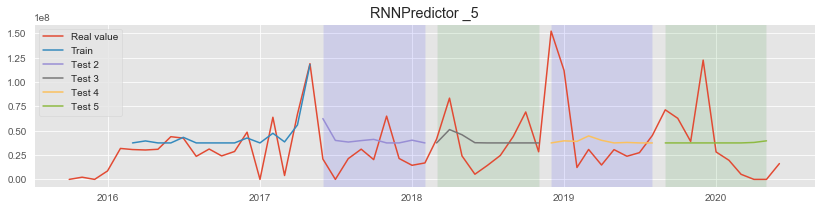

E:\SOFTWARE_NO_BORRAR\anaconda3\lib\site-packages\pandas\core\frame.py:4303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:7: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\Oscar\Documents\cortex\src\apps\error_metrics.py:12: RuntimeWarning:

divide by zero encountered in true_divide



         MAPE         MPE           MAE           MSE          RMSE        R2
0         inf        -inf  2.013712e+07  5.414490e+14  2.326906e+07 -0.773548
1  141.819898 -100.393564  3.385049e+07  2.104544e+15  4.587531e+07 -0.110456
2   91.884682  -72.454516  2.532320e+07  8.674023e+14  2.945169e+07  0.045984
3         inf        -inf  3.242277e+07  1.342404e+15  3.663883e+07  0.023757


In [24]:
periodList =  [str(i['id']) for i in splitRows]
for i in range(1,7):
    yVar = '_'+str(i)
    dfTem,dfError = trainAndPredict(alName, yVar, periodList)
    print(dfError)
    plotData(alName, yVar, dfTem)